In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)

# Preprocessing

In [2]:
df = pd.read_csv('features.csv', index_col=0)
y = pd.read_csv('target.csv', index_col=0)

In [3]:
df['target'] = y.values

df.reset_index(drop=True, inplace=True)
df

,entropy,max,min,var,std,pac,inst_freq,enegry_ratio,kurt,skew,pwr_peak,pwr_ratio,iqr,zero_crossing,patient,target
0,29.897353,8.091391,-7.553670,1.097079e+01,3.312218,0.007602,0.0,0.120569,0.010773,-0.033945,4.0,0.899994,4.029572,10.0,1,0.0
1,29.897353,5.928173,-14.157543,2.157566e+01,4.644960,-1.735253,4.0,0.098493,-0.017819,-0.542237,8.0,0.949523,6.236193,8.0,1,0.0
2,29.897353,15.669666,-15.250975,5.085399e+01,7.131199,4.234745,0.0,0.087543,0.027004,-0.827146,2.0,0.487255,11.075131,3.0,1,0.0
3,29.897353,13.545389,-4.082267,1.740903e+01,4.172413,3.120965,14.0,0.032618,-0.379743,0.357729,2.0,0.557269,5.532123,10.0,1,0.0
4,29.897353,5.156864,-18.439003,2.629339e+01,5.127708,-6.234981,2.0,0.384502,-0.269574,-0.229130,6.0,0.905385,7.240626,6.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,6.520206,-74339.564209,-450786.506759,1.516017e+10,123126.629033,-317909.476667,0.0,0.000096,-1.163700,0.549308,2.0,0.077325,220239.697374,0.0,8,0.0
28796,29.897353,436833.705504,-394915.176395,7.098911e+10,266437.820194,97336.015329,0.0,0.000108,-1.217209,-0.385081,2.0,0.060239,479521.669079,1.0,8,0.0
28797,6.636136,462800.870577,341198.752251,1.782552e+09,42220.275376,412148.961755,0.0,0.002060,-1.382489,-0.495262,2.0,0.112587,75528.690476,0.0,8,0.0
28798,6.570588,342772.039554,128183.444989,5.613312e+09,74922.038359,237536.856308,0.0,0.000372,-1.502604,0.052310,2.0,0.193918,146536.113410,0.0,8,0.0


In [4]:
df.describe()

,entropy,max,min,var,std,pac,inst_freq,enegry_ratio,kurt,skew,pwr_peak,pwr_ratio,iqr,zero_crossing,patient,target
count,28800.000000,2.880000e+04,2.880000e+04,2.880000e+04,2.880000e+04,2.880000e+04,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000,2.880000e+04,28800.000000,28800.000000,28800.000000
mean,24.823843,1.527960e+07,-1.588988e+07,5.867896e+14,9.359031e+06,4.109374e+04,0.712292,0.032274,-0.262746,-0.037743,2.466389,0.268174,1.547320e+07,2.753958,4.500000,0.539132
std,9.635434,4.598231e+07,4.200379e+07,3.481652e+15,2.234313e+07,3.446173e+07,2.504928,0.068338,3.128365,0.863352,2.090619,0.244895,4.019902e+07,3.298450,2.291328,0.498475
min,5.010299,-3.494350e+08,-3.898367e+08,1.925937e+00,1.387781e+00,-3.504987e+08,0.000000,0.000004,-1.979540,-8.194366,0.000000,0.000061,1.779601e+00,0.000000,1.000000,0.000000
25%,29.897353,5.223270e+02,-1.568800e+07,1.396998e+08,1.181947e+04,-7.154707e+04,0.000000,0.000681,-1.248300,-0.493064,2.000000,0.085398,1.612925e+04,1.000000,2.750000,0.000000
50%,29.897353,6.764611e+04,-7.119423e+04,3.323594e+09,5.765062e+04,2.721787e-02,0.000000,0.005534,-0.872369,-0.024668,2.000000,0.155103,9.608807e+04,1.000000,4.500000,1.000000
75%,29.897353,1.256739e+07,-8.270995e+02,8.884892e+13,9.425970e+06,6.744669e+04,0.000000,0.030930,-0.261624,0.427799,2.000000,0.384514,1.332305e+07,4.000000,6.250000,1.000000
max,29.897353,5.172921e+08,3.037376e+08,1.032769e+17,3.213672e+08,3.642011e+08,26.000000,0.872278,72.120469,7.788868,40.000000,0.997826,6.597519e+08,37.000000,8.000000,1.000000


## EDA

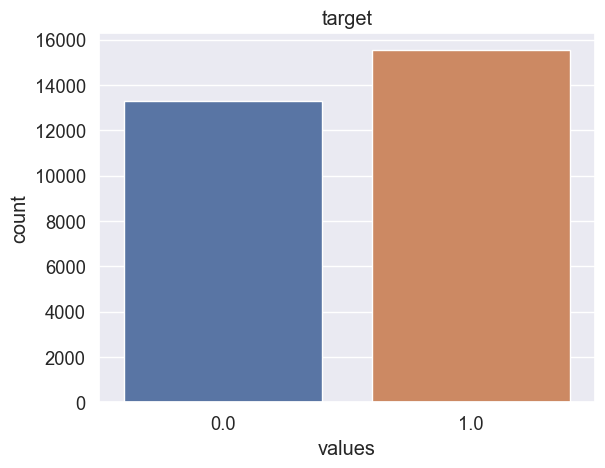

In [5]:
sns.countplot(df, x="target")
plt.title('target')
plt.xlabel('values')
plt.show()

In [6]:
df['target'].value_counts()

target
1.0    15527
0.0    13273
Name: count, dtype: int64

We get a look at some spindles from patient 2

In [7]:
pat2 = np.loadtxt('data/excerpt2.txt', skiprows=1)
marks = np.loadtxt('data/Automatic_detection_excerpt2.txt', skiprows=1)

final = marks[:,0]+marks[:,1]
marks[:5,0]

array([ 1.035,  7.55 , 22.95 , 26.105, 31.45 ])

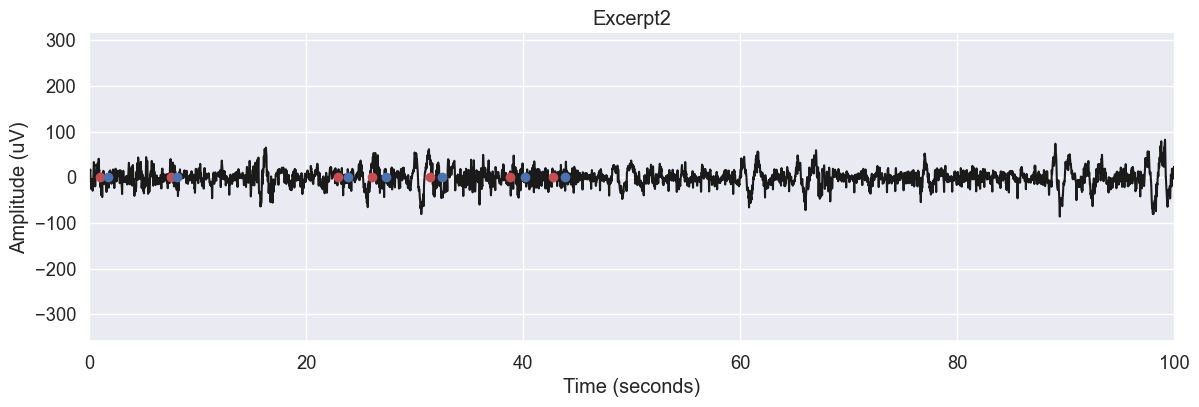

In [8]:
# Define sampling frequency and time vector
sf = 200.
times = np.arange(pat2.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, pat2, lw=1.5, color='k')
lvl = np.ones(len(marks[:,0]))
plt.plot(marks[:,0],lvl,'ro')
plt.plot(final[:],lvl,'bo')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([0, 100])
plt.title('Excerpt2')
sns.despine()

Red point is the start of the spindle, blue point is the end of it.

## Data splitting

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [10]:
def train_test_split_custom(X, y):

    X_tr = X[(X['patient'] >= 1) & (X['patient'] <= 6)].reset_index(drop=True)
    X_te = X[(X['patient'] >= 7) & (X['patient'] <= 8)].reset_index(drop=True)

    y_tr = y[(y['patient'] >= 1) & (y['patient'] <= 6)].reset_index(drop=True)
    y_te = y[(y['patient'] >= 7) & (y['patient'] <= 8)].reset_index(drop=True)

    y_tr = y_tr.drop('patient', axis = 1)
    y_te = y_te.drop('patient', axis = 1)

    return X_tr, X_te, y_tr, y_te

In [11]:
def reset():
    """
    Function to reset the data and have the original TRAIN and TEST.
    To use when trying various preprocessing methods (like first we try undersampling, then over, etc.)
    """
    df = pd.read_csv('features.csv', index_col=0)
    y = pd.read_csv('target.csv', index_col=0)
    df['target'] = y.values

    y = df[['target', 'patient']]
    X = df.drop('target', axis = 1)

    X_tr, X_te, y_tr, y_te = train_test_split_custom(X, y)

    return X_tr, X_te, y_tr, y_te

In [12]:
y = df[['target', 'patient']]
X = df.drop('target', axis = 1)

X_tr, X_te, y_tr, y_te = train_test_split_custom(X, y)
y_tr

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
21595,0.0
21596,0.0
21597,0.0
21598,0.0


## Normalization and undersampling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# we should normalize also the target, for both test and train
"""
def normalize(X_tr, X_te): # same shape returned by train_test split for consistency

    scaler = MinMaxScaler()

    # normalized data
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)

    return X_tr, X_te
""" 

def normalize(data_train, X_te, target_train, y_te): # same shape returned by train_test split for consistency

    scaler = MinMaxScaler()

    # normalized data
    X_tr = scaler.fit_transform(data_train)
    X_te = scaler.transform(X_te)

    y_tr = scaler.fit_transform(np.asarray(target_train).reshape((-1,1))) # reshape so we can plot it later
    y_te = scaler.transform(np.asarray(y_te).reshape((-1,1)))

    return X_tr, X_te, y_tr, y_te

<Axes: >

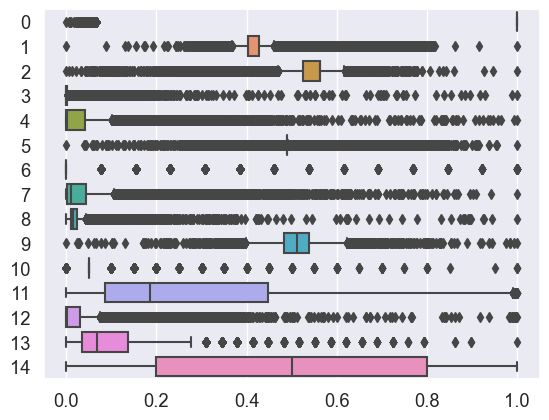

In [15]:
sns.boxplot(data=normalize(X_tr, X_te, y_tr, y_te)[0], orient='h')

In [16]:
X_tr, X_te, y_tr, y_te = normalize(X_tr, X_te, y_tr, y_te)

In [17]:
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [18]:
def undersample(X_tr, y_tr):

    rus = RandomUnderSampler()

    # undersampled data
    X_train, y_train = rus.fit_resample(X_tr, y_tr)

    return X_train, y_train


def oversample(X_tr, y_tr):

    ros = RandomOverSampler()

    # oversampled data
    X_train, y_train = ros.fit_resample(X_tr, y_tr)
    return X_train, y_train


def smote(X_tr, y_tr):
    sm = SMOTE(random_state=0)
    
    # oversample data
    X_train, y_train = sm.fit_resample(X_tr, y_tr)
    return X_train, y_train

### Undersampling

In [19]:
X_train_us, y_train_us = undersample(X_tr, y_tr)

unique, counts = np.unique(y_train_us, return_counts=True)
print(f'New shape:\n{dict(zip(unique, counts))}')

New shape:
{0.0: 10059, 1.0: 10059}


### Oversampling

In [20]:
X_train_os, y_train_os = oversample(X_tr, y_tr)

unique, counts = np.unique(y_train_os, return_counts=True)
print(f'New shape:\n{dict(zip(unique, counts))}')

New shape:
{0.0: 11541, 1.0: 11541}


### SMOTE

In [21]:
sm = SMOTE(random_state=0)
X_train_sm, y_train_sm = sm.fit_resample(X_tr, y_tr)
unique, counts = np.unique(y_train_sm, return_counts=True)
print(f'New shape:\n{dict(zip(unique, counts))}')

New shape:
{0.0: 11541, 1.0: 11541}


# modelling

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, classification_report, confusion_matrix
# from sklearn.svm import SVC
from xgboost import XGBClassifier

In [23]:
def evaluate(y_true, y_hat):
    base_rocauc = roc_auc_score(y_true, y_hat)

    tn, fp, fn, tp = confusion_matrix(y_true, y_hat).ravel()
    specificity = tn / (tn+fp)
    sensitivity = tp / (tp+fn)
    fpr = fp / (fp+tn)

    print(f"sensitivity: {sensitivity:.4f}")
    print(f"specificity: {specificity:.4f}")
    print(f"FPR: {fpr:.4f}")
    print(f'Roc auc: {base_rocauc:0.4f}')

### Random Forest Classifier

With undersampling

              precision    recall  f1-score   support

         0.0       0.42      0.20      0.27      3214
         1.0       0.55      0.78      0.64      3986

    accuracy                           0.52      7200
   macro avg       0.49      0.49      0.46      7200
weighted avg       0.49      0.52      0.48      7200

sensitivity: 0.7830
specificity: 0.1988
FPR: 0.8012
Roc auc: 0.4909


Text(70.45000000000006, 0.5, 'Actual label')

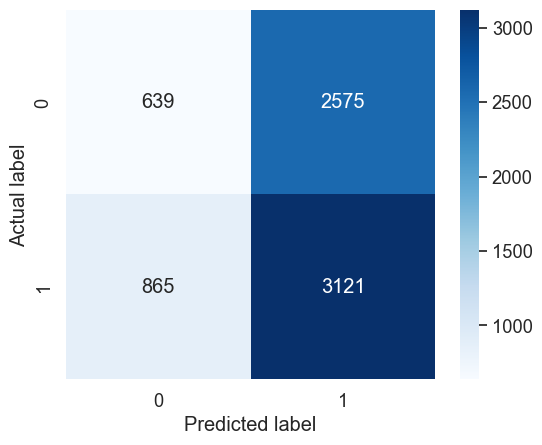

In [24]:
# Train random forest classifier on unsersampled data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_us, y_train_us)
# Evaluate model on test data
y_pred = clf.predict(X_te)
print(classification_report(y_te, y_pred))
evaluate(y_te, y_pred)

mat = confusion_matrix(y_te, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Undersampling is predicting too often the minority class

With oversampling

              precision    recall  f1-score   support

         0.0       0.41      0.13      0.19      3214
         1.0       0.55      0.85      0.67      3986

    accuracy                           0.53      7200
   macro avg       0.48      0.49      0.43      7200
weighted avg       0.49      0.53      0.46      7200

sensitivity: 0.8550
specificity: 0.1251
FPR: 0.8749
Roc auc: 0.4900


Text(70.45000000000006, 0.5, 'Actual label')

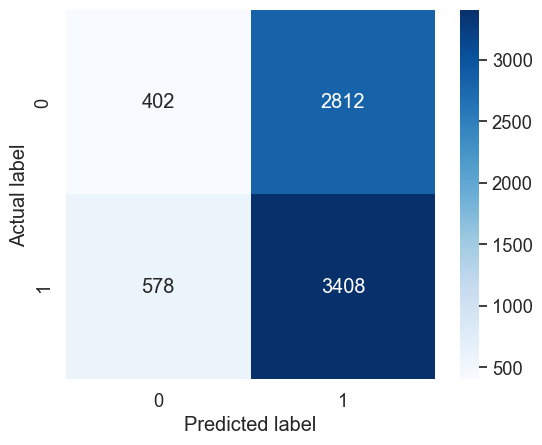

In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_os, y_train_os)
y_pred = clf.predict(X_te)
print(classification_report(y_te, y_pred))
evaluate(y_te, y_pred)

mat = confusion_matrix(y_te, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Oversampling almost never catches the true positives

With SMOTE

              precision    recall  f1-score   support

         0.0       0.43      0.18      0.25      3214
         1.0       0.55      0.80      0.65      3986

    accuracy                           0.53      7200
   macro avg       0.49      0.49      0.45      7200
weighted avg       0.49      0.53      0.47      7200

sensitivity: 0.8033
specificity: 0.1805
FPR: 0.8195
Roc auc: 0.4919


Text(70.45000000000006, 0.5, 'Actual label')

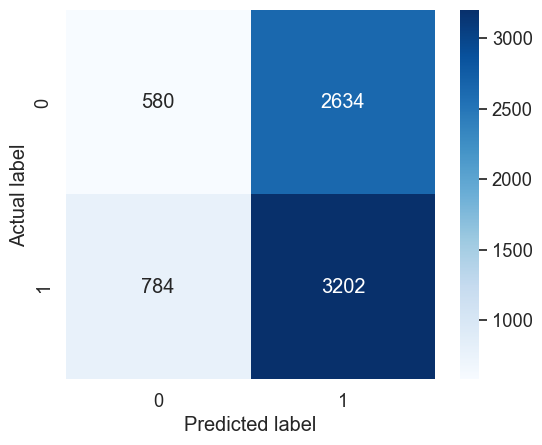

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_sm, y_train_sm)
y_pred = clf.predict(X_te)
print(classification_report(y_te, y_pred))
evaluate(y_te, y_pred)

mat = confusion_matrix(y_te, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

SMOTE is getting false positives

## XGBoost

With undersampling

              precision    recall  f1-score   support

         0.0       0.44      0.20      0.28      3214
         1.0       0.55      0.80      0.65      3986

    accuracy                           0.53      7200
   macro avg       0.50      0.50      0.47      7200
weighted avg       0.50      0.53      0.49      7200

sensitivity: 0.7955
specificity: 0.2026
FPR: 0.7974
Roc auc: 0.4990


Text(70.45000000000006, 0.5, 'Actual label')

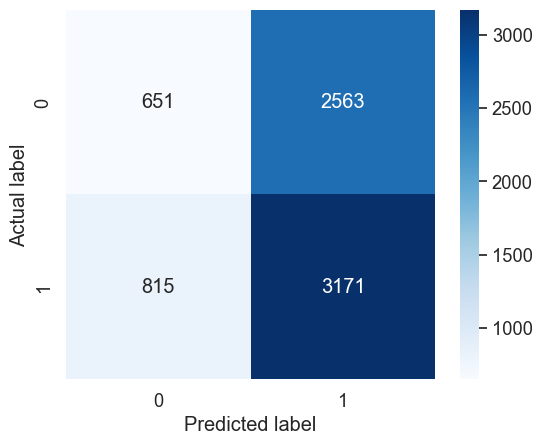

In [27]:
xgb = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='rmse')
xgb.fit(X_train_us, y_train_us)

# Evaluate model on test data
y_pred = xgb.predict(X_te)
print(classification_report(y_te, y_pred))
evaluate(y_te, y_pred)

mat = confusion_matrix(y_te, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

With undersampling there are plenty of false positives

With oversampling:

              precision    recall  f1-score   support

         0.0       0.43      0.22      0.29      3214
         1.0       0.55      0.77      0.64      3986

    accuracy                           0.52      7200
   macro avg       0.49      0.49      0.46      7200
weighted avg       0.49      0.52      0.48      7200

sensitivity: 0.7654
specificity: 0.2181
FPR: 0.7819
Roc auc: 0.4918


Text(70.45000000000006, 0.5, 'Actual label')

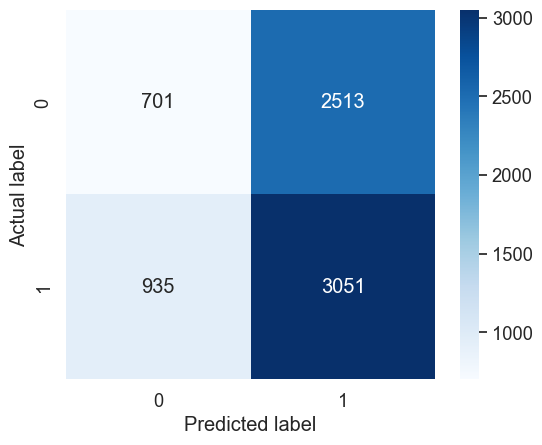

In [28]:
xgb = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='rmse')
xgb.fit(X_train_os, y_train_os)
y_pred = xgb.predict(X_te)

np.save('preds', y_pred)
print(classification_report(y_te, y_pred))
evaluate(y_te, y_pred)

mat = confusion_matrix(y_te, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

Oversampling with XGBoost appears to improve performances, there are still false positives

With Smote:

              precision    recall  f1-score   support

         0.0       0.45      0.21      0.29      3214
         1.0       0.55      0.79      0.65      3986

    accuracy                           0.53      7200
   macro avg       0.50      0.50      0.47      7200
weighted avg       0.51      0.53      0.49      7200

sensitivity: 0.7900
specificity: 0.2128
FPR: 0.7872
Roc auc: 0.5014


Text(70.45000000000006, 0.5, 'Actual label')

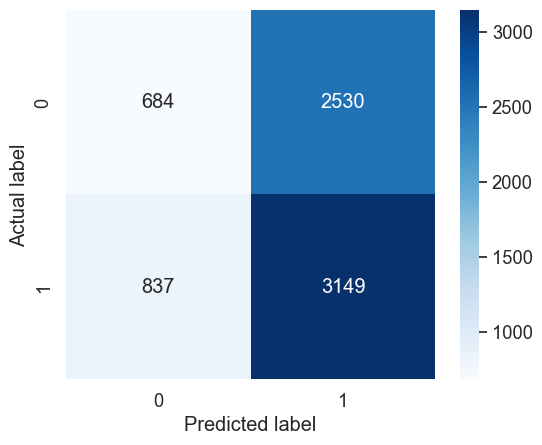

In [29]:
xgb = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='rmse')
xgb.fit(X_train_sm, y_train_sm)
y_pred = xgb.predict(X_te)
print(classification_report(y_te, y_pred))
evaluate(y_te, y_pred)

mat = confusion_matrix(y_te, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

XGBoost with SMOTE is good at classifying false samples false, thus it has few false positives

## Cross-validation for XGBoost

In [30]:
def cross_validate(X, y, sampling_method: callable):
    roc_auc = []
    sens = []
    spec = []
    plot_tr = []
    plot_te = []

    # Define the number of patients in your data
    num_patients = 8

    # Define the indices for each patient's data
    patient_indices = [np.where(df["patient"] == i)[0] for i in range(1, num_patients + 1)]

    # print(patient_indices)
    xgb = XGBClassifier(random_state=42, n_jobs=-1, eval_metric='auc')

    # Define the number of cross-validation folds
    num_folds = num_patients // 2

    # Loop over each fold in the leave-two-patients-out cross-validation
    for fold_idx in range(num_folds):
        # Get the indices for the training and test sets for this fold
        test_indices = np.concatenate([patient_indices[2*fold_idx], patient_indices[2*fold_idx+1]])
        train_indices = np.concatenate(patient_indices[:2*fold_idx] + patient_indices[2*fold_idx+2:])

        X_train, y_train = X.values[train_indices], y.target.values[train_indices]
        X_test, y_test = X.values[test_indices], y.target.values[test_indices]

        X_tr, X_test, y_tr, y_test = normalize(X_train, X_test, y_train, y_test)
        X_train, y_train = sampling_method(X_tr, y_tr)

        xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

        # Load evals result by calling the evals_result() function
        evals_result = xgb.evals_result()

        # plot learning curves
        plot_tr.append(evals_result['validation_0']['auc'])
        plot_te.append(evals_result['validation_1']['auc'])

        # Evaluate the trained classifier on the test set
        y_pred = xgb.predict(X_test)
        rocauc = roc_auc_score(y_test, y_pred)
        roc_auc.append(rocauc)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn+fp)
        sensitivity = tp / (tp+fn)

        sens.append(sensitivity)
        spec.append(specificity)

    return np.array(roc_auc).mean(), np.array(sens).mean(), np.array(spec).mean(), plot_tr, plot_te

Undersampling

[0]	validation_0-auc:0.62531	validation_1-auc:0.48530
[1]	validation_0-auc:0.64065	validation_1-auc:0.48582
[2]	validation_0-auc:0.64736	validation_1-auc:0.47951
[3]	validation_0-auc:0.65734	validation_1-auc:0.47743
[4]	validation_0-auc:0.66465	validation_1-auc:0.48732
[5]	validation_0-auc:0.66859	validation_1-auc:0.48732
[6]	validation_0-auc:0.67044	validation_1-auc:0.48732
[7]	validation_0-auc:0.67525	validation_1-auc:0.48806
[8]	validation_0-auc:0.68286	validation_1-auc:0.48507
[9]	validation_0-auc:0.69338	validation_1-auc:0.48503
[10]	validation_0-auc:0.69671	validation_1-auc:0.48558
[11]	validation_0-auc:0.70084	validation_1-auc:0.48356
[12]	validation_0-auc:0.70614	validation_1-auc:0.48210
[13]	validation_0-auc:0.71634	validation_1-auc:0.48308
[14]	validation_0-auc:0.72161	validation_1-auc:0.48096
[15]	validation_0-auc:0.72436	validation_1-auc:0.48303
[16]	validation_0-auc:0.72872	validation_1-auc:0.48534
[17]	validation_0-auc:0.73029	validation_1-auc:0.48534
[18]	validation_0-au

(0.5470148041247365, 0.4829279285548371)

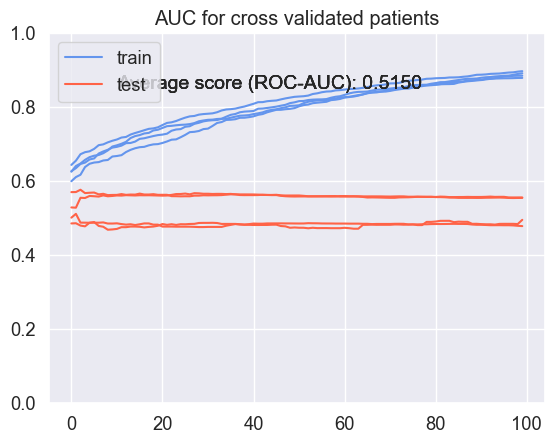

In [31]:
rocauc, sens, spec, plt_tr, plt_te = cross_validate(X, y, undersample)

for tr, te in zip(plt_tr, plt_te):
    plt.plot(tr, label='train', c='cornflowerblue')
    plt.plot(te, label='test', c='tomato')
    plt.legend(['train', 'test'])
    plt.ylim([0,1])
    plt.text(x=10, y=0.85, s=f"Average score (ROC-AUC): {rocauc:.4f}", font="Arial", size=14)
    plt.title('AUC for cross validated patients')

sens, spec

Oversampling

[0]	validation_0-auc:0.62835	validation_1-auc:0.48249
[1]	validation_0-auc:0.65170	validation_1-auc:0.48336
[2]	validation_0-auc:0.66350	validation_1-auc:0.49037
[3]	validation_0-auc:0.66582	validation_1-auc:0.49033
[4]	validation_0-auc:0.66821	validation_1-auc:0.48759
[5]	validation_0-auc:0.67368	validation_1-auc:0.49425
[6]	validation_0-auc:0.68118	validation_1-auc:0.49686
[7]	validation_0-auc:0.68392	validation_1-auc:0.49946
[8]	validation_0-auc:0.69414	validation_1-auc:0.50261
[9]	validation_0-auc:0.69916	validation_1-auc:0.50481
[10]	validation_0-auc:0.70270	validation_1-auc:0.50477
[11]	validation_0-auc:0.70718	validation_1-auc:0.50635
[12]	validation_0-auc:0.71052	validation_1-auc:0.50635
[13]	validation_0-auc:0.71311	validation_1-auc:0.50366
[14]	validation_0-auc:0.71422	validation_1-auc:0.50366
[15]	validation_0-auc:0.71656	validation_1-auc:0.50335
[16]	validation_0-auc:0.72388	validation_1-auc:0.50296
[17]	validation_0-auc:0.72720	validation_1-auc:0.50297
[18]	validation_0-au

(0.5609325215229146, 0.49395665876618294)

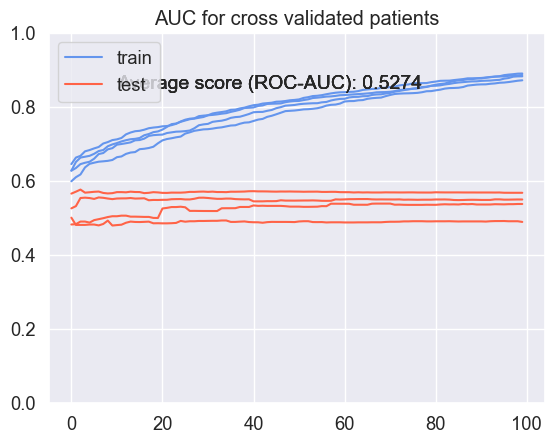

In [32]:
rocauc, sens, spec, plt_tr, plt_te = cross_validate(X, y, oversample)

for tr, te in zip(plt_tr, plt_te):
    plt.plot(tr, label='train', c='cornflowerblue')
    plt.plot(te, label='test', c='tomato')
    plt.legend(['train', 'test'])
    plt.ylim([0,1])
    plt.text(x=10, y=0.85, s=f"Average score (ROC-AUC): {rocauc:.4f}", font="Arial", size=14)
    plt.title('AUC for cross validated patients')

sens, spec

SMOTE

[0]	validation_0-auc:0.62746	validation_1-auc:0.48524
[1]	validation_0-auc:0.64451	validation_1-auc:0.48685
[2]	validation_0-auc:0.64949	validation_1-auc:0.48713
[3]	validation_0-auc:0.66460	validation_1-auc:0.49780
[4]	validation_0-auc:0.66827	validation_1-auc:0.49802
[5]	validation_0-auc:0.67535	validation_1-auc:0.50118
[6]	validation_0-auc:0.67954	validation_1-auc:0.49806
[7]	validation_0-auc:0.68753	validation_1-auc:0.50179
[8]	validation_0-auc:0.69200	validation_1-auc:0.50067
[9]	validation_0-auc:0.70150	validation_1-auc:0.50246
[10]	validation_0-auc:0.70849	validation_1-auc:0.50029
[11]	validation_0-auc:0.71020	validation_1-auc:0.50029
[12]	validation_0-auc:0.71580	validation_1-auc:0.49876
[13]	validation_0-auc:0.72077	validation_1-auc:0.49903
[14]	validation_0-auc:0.72387	validation_1-auc:0.49825
[15]	validation_0-auc:0.72630	validation_1-auc:0.49812
[16]	validation_0-auc:0.73515	validation_1-auc:0.50756
[17]	validation_0-auc:0.73758	validation_1-auc:0.50959
[18]	validation_0-au

(0.5821591383660657, 0.4447346860558266)

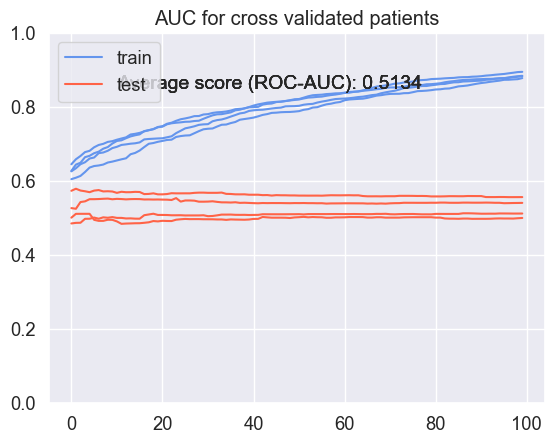

In [33]:
rocauc, sens, spec, plt_tr, plt_te = cross_validate(X, y, smote)

for tr, te in zip(plt_tr, plt_te):
    plt.plot(tr, label='train', c='cornflowerblue')
    plt.plot(te, label='test', c='tomato')
    plt.legend(['train', 'test'])
    plt.ylim([0,1])
    plt.text(x=10, y=0.85, s=f"Average score (ROC-AUC): {rocauc:.4f}", font="Arial", size=14)
    plt.title('AUC for cross validated patients')

sens, spec

# 

## Neural Network

In [34]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

With undersampling

In [35]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train_us, y_train_us, epochs=30, batch_size=30, validation_split=0.2)

Epoch 1/30
537/537 [==============================] - 1s 1ms/step - loss: 0.6612 - accuracy: 0.6240 - val_loss: 0.9770 - val_accuracy: 0.0022
Epoch 2/30
537/537 [==============================] - 1s 1ms/step - loss: 0.6570 - accuracy: 0.6258 - val_loss: 1.0819 - val_accuracy: 0.0042
Epoch 3/30
537/537 [==============================] - 1s 1ms/step - loss: 0.6557 - accuracy: 0.6285 - val_loss: 0.9602 - val_accuracy: 0.0340
Epoch 4/30
537/537 [==============================] - 1s 1ms/step - loss: 0.6546 - accuracy: 0.6308 - val_loss: 0.9738 - val_accuracy: 0.0368
Epoch 5/30
537/537 [==============================] - 1s 1ms/step - loss: 0.6538 - accuracy: 0.6333 - val_loss: 0.9552 - val_accuracy: 0.0549
Epoch 6/30
537/537 [==============================] - 1s 994us/step - loss: 0.6528 - accuracy: 0.6350 - val_loss: 0.9570 - val_accuracy: 0.0631
Epoch 7/30
537/537 [==============================] - 1s 1ms/step - loss: 0.6527 - accuracy: 0.6370 - val_loss: 0.9794 - val_accuracy: 0.0594
Epoc

[]

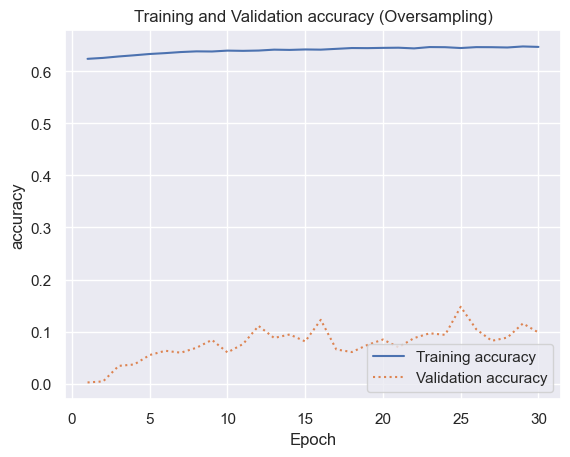

In [36]:
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation accuracy (Oversampling)')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.plot()

225/225 [==============================] - 0s 603us/step


Text(74.45000000000006, 0.5, 'Actual label')

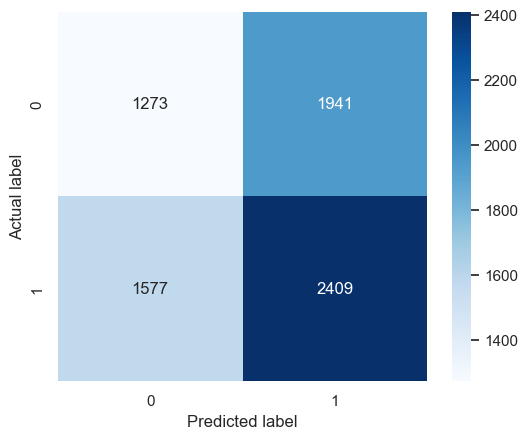

In [37]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_te) > 0.5

mat = confusion_matrix(y_te, y_predicted)
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [38]:
print(classification_report(y_te, y_predicted))
evaluate(y_te, y_predicted)

              precision    recall  f1-score   support

         0.0       0.45      0.40      0.42      3214
         1.0       0.55      0.60      0.58      3986

    accuracy                           0.51      7200
   macro avg       0.50      0.50      0.50      7200
weighted avg       0.51      0.51      0.51      7200

sensitivity: 0.6044
specificity: 0.3961
FPR: 0.6039
Roc auc: 0.5002


With oversampling

In [39]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train_os, y_train_os, epochs=30, batch_size=30, validation_split=0.2)

Epoch 1/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6879 - accuracy: 0.5422 - val_loss: 0.7265 - val_accuracy: 0.4293
Epoch 2/30
616/616 [==============================] - 1s 993us/step - loss: 0.6829 - accuracy: 0.5428 - val_loss: 0.7283 - val_accuracy: 0.4340
Epoch 3/30
616/616 [==============================] - 1s 981us/step - loss: 0.6813 - accuracy: 0.5445 - val_loss: 0.7431 - val_accuracy: 0.4288
Epoch 4/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6799 - accuracy: 0.5447 - val_loss: 0.7350 - val_accuracy: 0.4566
Epoch 5/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6785 - accuracy: 0.5458 - val_loss: 0.7711 - val_accuracy: 0.4243
Epoch 6/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6773 - accuracy: 0.5468 - val_loss: 0.7277 - val_accuracy: 0.4858
Epoch 7/30
616/616 [==============================] - 1s 974us/step - loss: 0.6765 - accuracy: 0.5455 - val_loss: 0.7639 - val_accuracy: 0.4321


[]

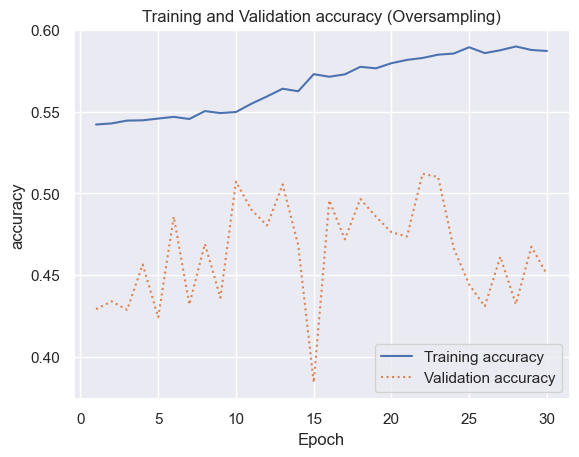

In [40]:
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation accuracy (Oversampling)')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.plot()

225/225 [==============================] - 0s 592us/step


Text(74.45000000000006, 0.5, 'Actual label')

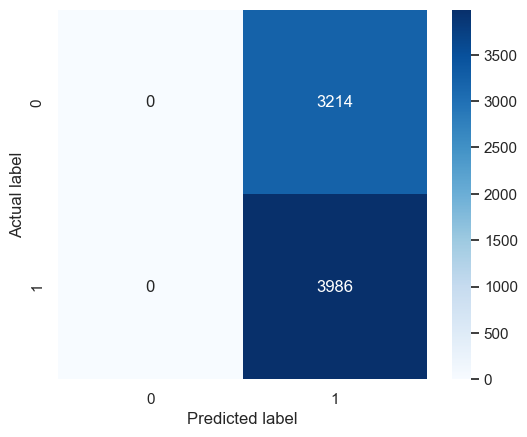

In [41]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_te) > 0.5

mat = confusion_matrix(y_te, y_predicted)
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [42]:
print(classification_report(y_te, y_predicted))
evaluate(y_te, y_predicted)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3214
         1.0       0.55      1.00      0.71      3986

    accuracy                           0.55      7200
   macro avg       0.28      0.50      0.36      7200
weighted avg       0.31      0.55      0.39      7200

sensitivity: 1.0000
specificity: 0.0000
FPR: 1.0000
Roc auc: 0.5000


f:\miniforge3\envs\yasa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\miniforge3\envs\yasa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\miniforge3\envs\yasa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With SMOTE

In [43]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train_sm, y_train_sm, epochs=30, batch_size=30, validation_split=0.2)

Epoch 1/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.5319 - val_loss: 0.7180 - val_accuracy: 0.4245
Epoch 2/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6832 - accuracy: 0.5434 - val_loss: 0.7558 - val_accuracy: 0.4072
Epoch 3/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6809 - accuracy: 0.5428 - val_loss: 0.7414 - val_accuracy: 0.4390
Epoch 4/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6795 - accuracy: 0.5435 - val_loss: 0.7584 - val_accuracy: 0.4397
Epoch 5/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6786 - accuracy: 0.5413 - val_loss: 0.7493 - val_accuracy: 0.4542
Epoch 6/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6773 - accuracy: 0.5478 - val_loss: 0.7683 - val_accuracy: 0.4351
Epoch 7/30
616/616 [==============================] - 1s 1ms/step - loss: 0.6763 - accuracy: 0.5462 - val_loss: 0.7842 - val_accuracy: 0.4317
Epoch 

[]

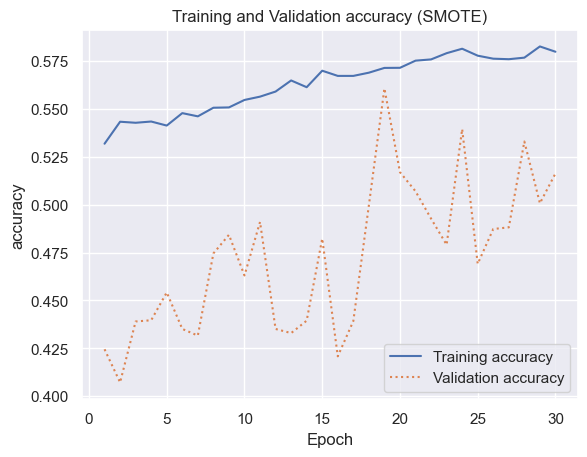

In [44]:
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation accuracy (SMOTE)')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.plot()

225/225 [==============================] - 0s 630us/step


Text(74.45000000000006, 0.5, 'Actual label')

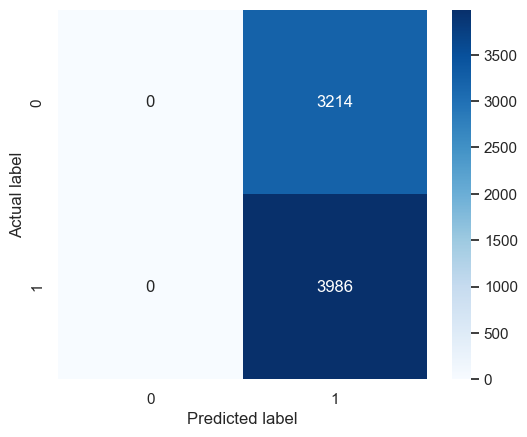

In [45]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_te) > 0.5
mat = confusion_matrix(y_te, y_predicted)
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [46]:
print(classification_report(y_te, y_predicted))
evaluate(y_te, y_predicted)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3214
         1.0       0.55      1.00      0.71      3986

    accuracy                           0.55      7200
   macro avg       0.28      0.50      0.36      7200
weighted avg       0.31      0.55      0.39      7200

sensitivity: 1.0000
specificity: 0.0000
FPR: 1.0000
Roc auc: 0.5000


f:\miniforge3\envs\yasa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\miniforge3\envs\yasa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
f:\miniforge3\envs\yasa\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Personalized spindles detection

In [47]:
df_list = [df[df['patient'] == 1], 
df[df['patient'] == 2], 
df[df['patient'] == 3], 
df[df['patient'] == 4], 
df[df['patient'] == 5], 
df[df['patient'] == 6], 
df[df['patient'] == 7],  
df[df['patient'] == 8]
]


In [48]:
X_list = []
y_list = [] 
for item in df_list:
    X_list.append(item.drop('target', axis = 1))
    y_list.append(item['target'])

XGBoost with SMOTE appears to have the best f1 score on the global dataset, so it is a good candidate to work well with personalized predictions

In [49]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_list[1], y_list[1], test_size=0.25)

In [50]:
sm = SMOTE(random_state=0)
X_train_p_sm, y_train_p_sm = sm.fit_resample(X_train_p, y_train_p)
unique, counts = np.unique(y_train_p_sm, return_counts=True)
print(f'New shape:\n{dict(zip(unique, counts))}')

New shape:
{0.0: 1426, 1.0: 1426}


              precision    recall  f1-score   support

         0.0       0.48      0.46      0.47       435
         1.0       0.51      0.54      0.52       465

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.50       900
weighted avg       0.50      0.50      0.50       900

sensitivity: 0.5355
specificity: 0.4598
FPR: 0.5402
Roc auc: 0.4976


Text(74.45000000000006, 0.5, 'Actual label')

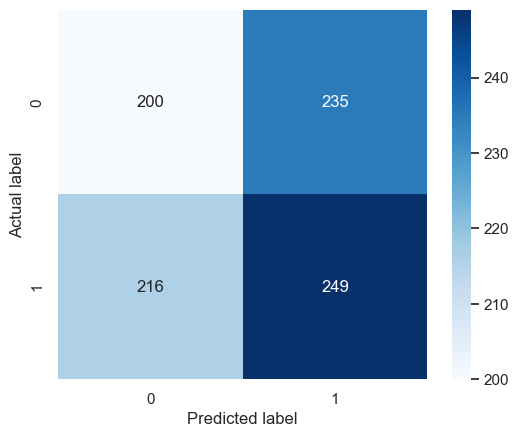

In [51]:
xgb = XGBClassifier(random_state=42, n_jobs=-1)
xgb.fit(X_train_p_sm, y_train_p_sm)
y_pred = xgb.predict(X_test_p)
print(classification_report(y_test_p, y_pred))
evaluate(y_test_p, y_pred)

mat = confusion_matrix(y_test_p, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

New shape:
{0.0: 1405, 1.0: 1405}
              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51       414
         1.0       0.57      0.55      0.56       486

    accuracy                           0.54       900
   macro avg       0.53      0.53      0.53       900
weighted avg       0.54      0.54      0.54       900

sensitivity: 0.5514
specificity: 0.5169
FPR: 0.4831
Roc auc: 0.5342
New shape:
{0.0: 1422, 1.0: 1422}
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51       431
         1.0       0.56      0.58      0.57       469

    accuracy                           0.54       900
   macro avg       0.54      0.54      0.54       900
weighted avg       0.54      0.54      0.54       900

sensitivity: 0.5800
specificity: 0.5012
FPR: 0.4988
Roc auc: 0.5406
New shape:
{0.0: 1399, 1.0: 1399}
              precision    recall  f1-score   support

         0.0       0.48      0.50      0.48       408

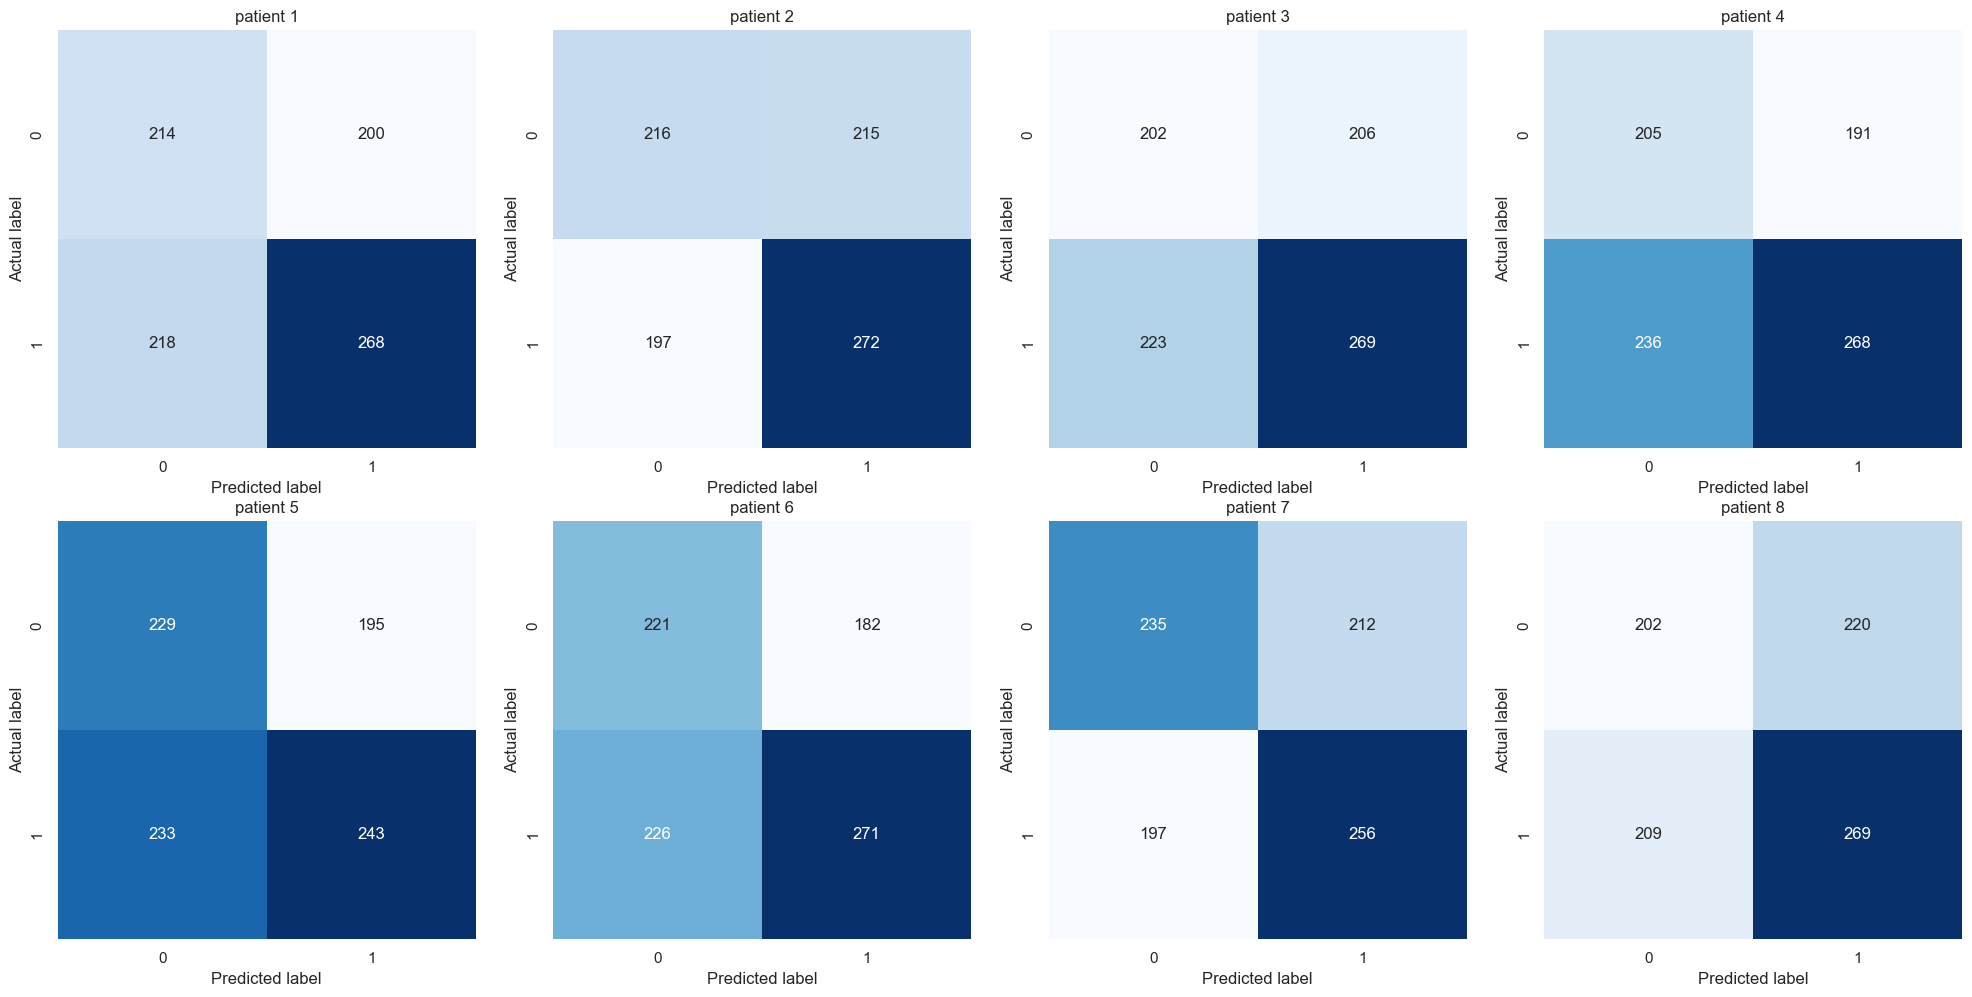

In [52]:
fig, axs = plt.subplots(2,4, figsize=(20,10))

for i in range(1,9):
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_list[1], y_list[1], test_size=0.25)
    sm = SMOTE(random_state=0)
    X_train_p_sm, y_train_p_sm = sm.fit_resample(X_train_p, y_train_p)
    unique, counts = np.unique(y_train_p_sm, return_counts=True)
    print(f'New shape:\n{dict(zip(unique, counts))}')
    xgb = XGBClassifier(random_state=42, n_jobs=-1)
    xgb.fit(X_train_p_sm, y_train_p_sm)
    y_pred = xgb.predict(X_test_p)
    print(classification_report(y_test_p, y_pred))
    evaluate(y_test_p, y_pred)

    mat = confusion_matrix(y_test_p, y_pred)
    if i > 4:
        sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='Blues', ax=axs[1][i-5])
        axs[1][i-5].set_xlabel('Predicted label')
        axs[1][i-5].set_ylabel('Actual label')
        axs[1][i-5].set_title(f'patient {i}')
    else:
        sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='Blues', ax=axs[0][i-1])
        axs[0][i-1].set_xlabel('Predicted label')
        axs[0][i-1].set_ylabel('Actual label')
        axs[0][i-1].set_title(f'patient {i}')

plt.tight_layout()
    

# YASA

In [53]:
from os.path import join as pjoin
from scipy.signal import butter, filtfilt, resample

In [54]:
# Define bandpass filter
def bandpass_filter(x, f_low, f_high, fs, n=2):
  f_nyquist = 0.5 * fs
  low = f_low / f_nyquist
  high = f_high / f_nyquist
  b, a = butter(n, [low, high], btype="band")
  y = filtfilt(b, a, x)
  return y

In [55]:
from scipy.signal import resample

def resample_sig(sig, fs_res=200):
    # Resampling
    n_samps = sig.shape[0] # Number of samples in signal
    time_seconds = 1800  # 30 minutes = 1800 seconds

    fs = n_samps / time_seconds
    n_samps_res = int(n_samps/fs*fs_res) # Number of samples in signal after resampling
    return resample(sig, n_samps_res)

In [56]:
def load_txt_signal(file, f_low=0.3, f_high=35):
    file_name = pjoin('data/', file)

    # data is for channel C3-A1
    data = np.loadtxt(file_name, skiprows=1)

    # resample
    resampled = resample_sig(data)
    # filter
    filtered = bandpass_filter(resampled, f_low, f_high, 200, 4)

    return filtered

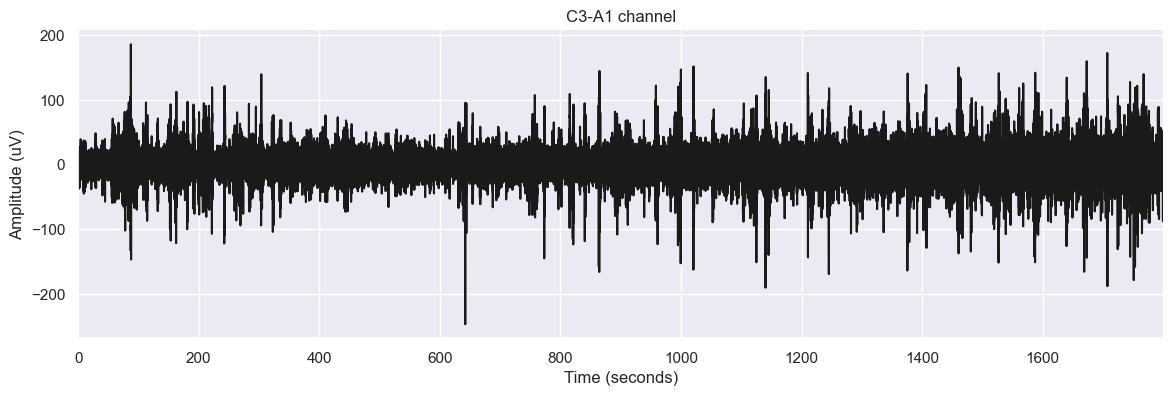

In [57]:
import yasa
# Load data
data = load_txt_signal('excerpt7.txt')

# Define sampling frequency and time vector
sf = 200.
times = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('C3-A1 channel')
sns.despine()

In [58]:
# Apply the detection using yasa.spindles_detect
sp = yasa.spindles_detect(data, sf)

# Display the results using .summary()
sp.summary()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,81.170,81.365,81.780,0.610,91.416696,22.157430,2.781519,0.339717,14.112060,8.0,0.317073,CHAN000,0
1,167.360,167.455,167.915,0.555,42.796660,10.060781,1.980468,0.314219,12.690955,7.0,0.169643,CHAN000,0
2,278.855,279.365,279.975,1.120,63.596949,13.741187,2.078648,0.482598,13.835549,16.0,0.453333,CHAN000,0
3,666.915,667.535,667.570,0.655,118.302062,22.180929,2.391149,0.249980,13.621344,8.0,0.939394,CHAN000,0
4,685.735,685.910,686.350,0.615,55.794708,13.324578,2.302275,0.467132,14.007987,6.0,0.282258,CHAN000,0
5,878.120,878.510,878.940,0.820,70.699428,12.377455,2.049892,0.416627,13.249373,11.0,0.472727,CHAN000,0
6,892.950,893.245,893.460,0.510,112.997591,25.451495,2.865763,0.382856,14.210907,8.0,0.572816,CHAN000,0
7,910.910,911.360,911.500,0.590,86.561761,20.750629,2.747329,0.358458,14.053065,8.0,0.756303,CHAN000,0
8,1056.305,1056.650,1056.990,0.685,81.351400,17.685957,2.476430,0.455543,13.616975,8.0,0.500000,CHAN000,0
9,1115.490,1115.605,1116.140,0.650,95.922996,20.428021,2.565041,0.328481,13.631006,8.0,0.175573,CHAN000,0


In [59]:
# Let's get a bool vector indicating for each sample
mask = sp.get_mask()
mask

array([0, 0, 0, ..., 0, 0, 0])

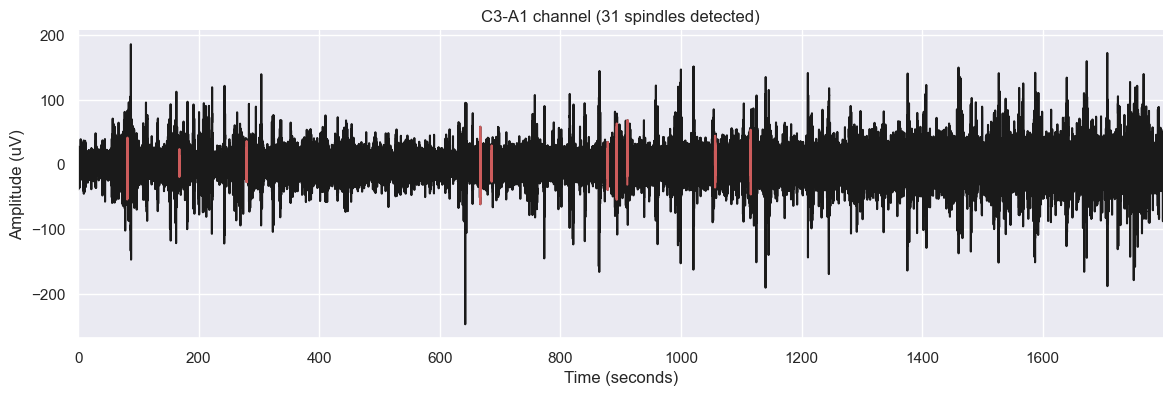

In [60]:
# Now let's plot
spindles_highlight = data * mask
spindles_highlight[spindles_highlight == 0] = np.nan

plt.figure(figsize=(14, 4))
plt.plot(times, data, 'k')
plt.plot(times, spindles_highlight, 'indianred')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([0, times[-1]])
plt.title('C3-A1 channel (31 spindles detected)')
sns.despine()

In [61]:
from keras.models import load_model
preds = np.load('preds.npy')[:3600]

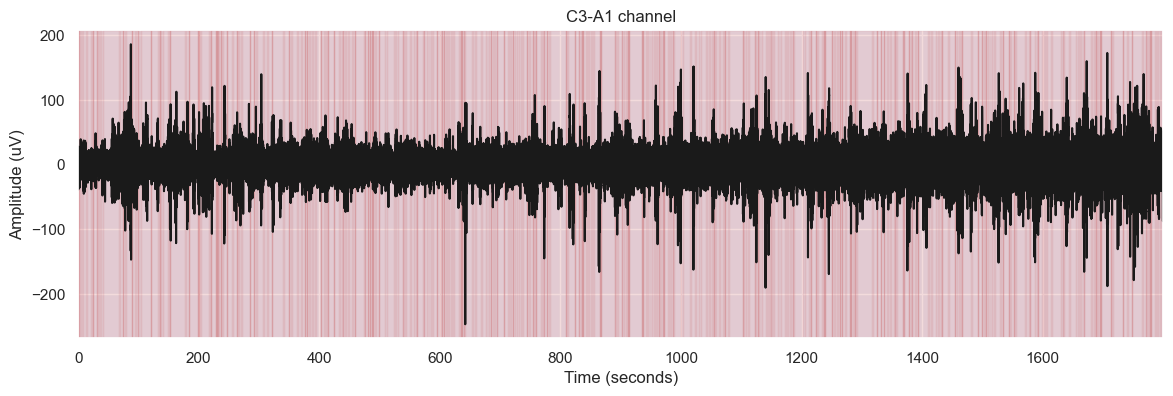

In [62]:
sf = 200.
times = np.arange(data.size) / sf
true_indices = np.where(preds)[0]
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, data, lw=1.5, color='k')

color = 'r'
start = None
for i, idx in enumerate(true_indices):
    t = idx * 0.5
    if i == 0 or idx - true_indices[i-1] > 1:
        start = t
    if i == len(true_indices) - 1 or true_indices[i+1] - idx > 1:
        end = t
        plt.axvspan(start, end, alpha=0.2, color=color)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('C3-A1 channel')
plt.show()


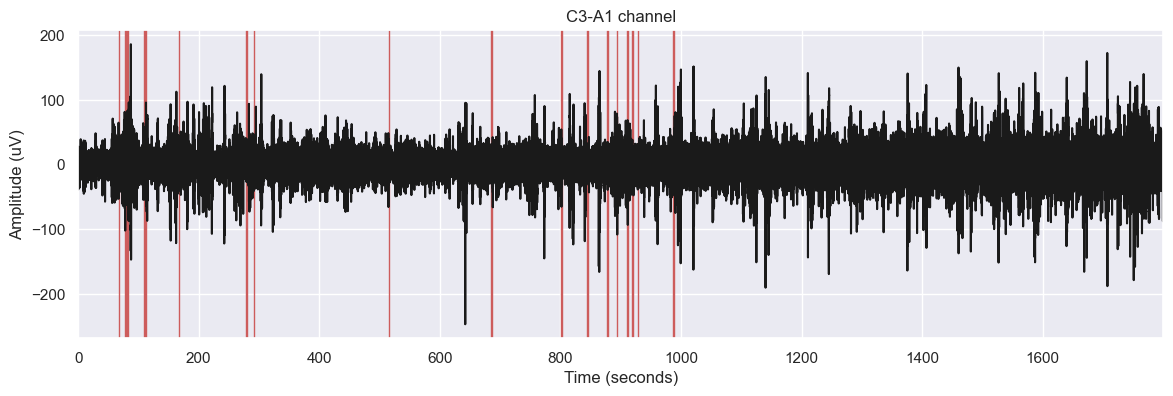

In [63]:
spindle_labels = np.loadtxt('data/Visual_scoring1_excerpt7.txt', skiprows=1)

fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('C3-A1 channel')

for start, duration in spindle_labels:
    end = start + duration
    ax.axvspan(start, end, color='indianred')

# Non ML models

In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import detrend
from mne.time_frequency import morlet

In [65]:
# source: https://raphaelvallat.com/spindles.html

def detect_spindles(x, sf, times, thresh=0.25, wlt_params={'nc': 12, 'cf': 'auto'}):
    """Simple spindles detector based on Morlet wavelet.

    Parameters
    ----------
    x : 1D-array
        EEG signal
    sf : float
        Sampling frequency
    times : 1D-array
        the timesteps in seconds
    thresh : float
        Threshold (0 - 1)
    wlt_params : dict
        Morlet wavelet parameters ::

        'nc' : number of oscillations
        'cf' : central frequency (int or 'auto')

    Returns
    -------
    supra_thresh_bool : 1D-array (boolean)
        Boolean array indicating for each point if it is a spindles or not.
    sp_params : dict
        Spindles parameters dictionnary.
    """
    from scipy.signal import detrend
    from mne.time_frequency import morlet, psd_array_multitaper

    if wlt_params['cf'] == 'auto':
        # Compute the power spectrum and find the peak 11-16 Hz frequency.
        psd, freqs = psd_array_multitaper(x, sf, fmin=11, fmax=16, verbose=0)
        wlt_params['cf'] = freqs[np.argmax(psd)]
        print('Central frequency: %.2f Hz' % wlt_params['cf'])

    # Compute the wavelet and convolve with data
    wlt = morlet(sf, [wlt_params['cf']], n_cycles=wlt_params['nc'])[0]
    analytic = np.convolve(x, wlt, mode='same')
    phase = np.angle(analytic)

    # Square and normalize the magnitude from 0 to 1 (using the min and max)
    power = np.square(np.abs(analytic))
    norm_power = (power - power.min()) / (power.max() - power.min())

    # Find supra-threshold values and indices
    supra_thresh_bool = norm_power >= thresh
    supra_thresh_idx = np.where(supra_thresh_bool)[0]

    # Extract duration, frequency and amplitude of spindles
    sp = np.split(supra_thresh_idx, np.where(np.diff(supra_thresh_idx) != 1)[0] + 1)
    idx_start_end = np.array([[k[0], k[-1]] for k in sp])
    sp_dur = (np.diff(idx_start_end, axis=1) / sf).flatten() * 1000
    sp_amp, sp_freq = np.zeros(len(sp)), np.zeros(len(sp))
    for i in range(len(sp)):
        sp_amp[i] = np.ptp(detrend(x[sp[i]]))
        sp_freq[i] = np.median((sf / (2 * np.pi) * np.diff(phase[sp[i]])))

    sp_params = {'Duration (ms)' : sp_dur, 'Frequency (Hz)': sp_freq,
                 'Amplitude (uV)': sp_amp}
    
    def plot():
        # Create vector for plotting purposes
        val_spindles = np.nan * np.zeros(x.size)
        val_spindles[supra_thresh_idx] = x[supra_thresh_idx]

        # Plot
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7), sharex=True)
        ax1.plot(times, x, lw=1, c='k')
        ax1.plot(times, val_spindles, color='indianred', alpha=.8)
        ax1.set_xlim(0, times[-1])
        ax1.set_ylabel('Voltage [uV]')
        ax1.set_title('Cz EEG signal')

        ax2.plot(times, norm_power, c='k')
        ax2.set_xlabel('Time [sec]')
        ax2.set_ylabel('Normalized wavelet power')
        ax2.axhline(thresh, ls='--', color='indianred', label='Threshold')
        ax2.fill_between(times, norm_power, thresh, where = norm_power >= thresh,
                        color='indianred', alpha=.8)
        plt.legend(loc='best')

    return supra_thresh_bool, sp_params, plot()

Text(0.5, 1.0, 'Cz EEG signal')

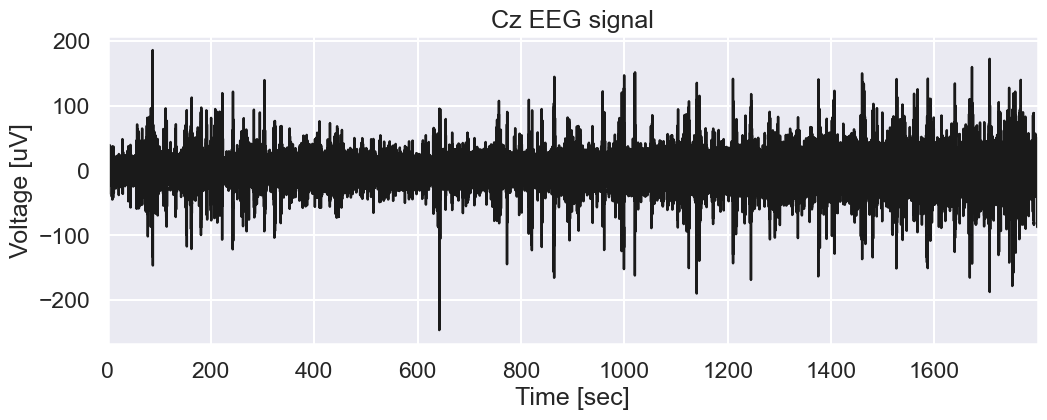

In [66]:
# Define sampling frequency and time vector
sf = 200.
times = np.arange(data.size) / sf

# Plot the signal
sns.set(context='talk')
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(times, data, lw=1.75, c='k')
ax.set_xlim(0, times[-1])
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Voltage [uV]')
ax.set_title('Cz EEG signal')

Central frequency: 11.59 Hz


C:\Users\Christian Berchtold\AppData\Local\Temp\ipykernel_15900\3574336228.py:34: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psd, freqs = psd_array_multitaper(x, sf, fmin=11, fmax=16, verbose=0)


(array([False, False, False, ..., False, False, False]),
 {'Duration (ms)': array([105., 630., 335.,  45., 200., 280., 230.,  30., 180., 450.]),
  'Frequency (Hz)': array([11.57112402, 11.65423698, 11.20312531, 11.62055869, 11.56949206,
         11.7128077 , 11.51958259, 11.3827697 , 11.68253067, 11.40219852]),
  'Amplitude (uV)': array([ 85.63669832, 312.54981481, 202.22576487,  20.43489562,
          80.06477311,  58.22333034,  57.71739934,  10.97421914,
          74.55586662,  72.15169038])},
 None)

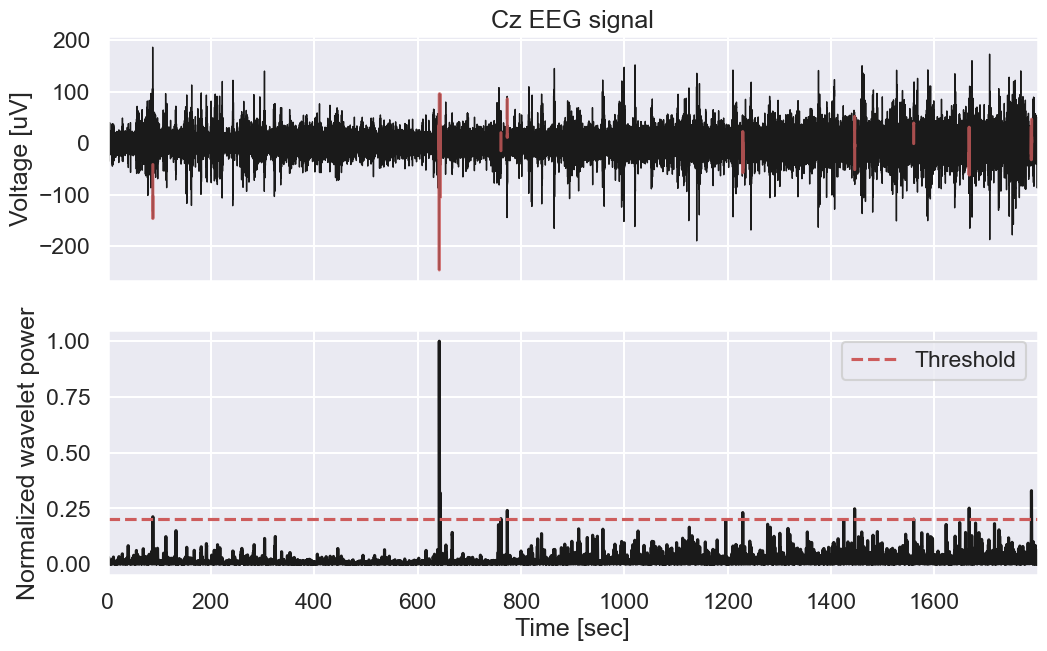

In [67]:
detect_spindles(data, sf, times, thresh=0.2)